<a href="https://colab.research.google.com/github/KhaiNghiTranNguyen/AI---ANN/blob/main/ANN_Face_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

data_dir = "/content/face_shape_dataset/FaceShape Dataset/training_set"

print("Folders in dataset:", os.listdir(data_dir))

img_size = 60

X = []
y = []

# Đọc ảnh
for label in os.listdir(data_dir):
    label_path = os.path.join(data_dir, label)
    if os.path.isdir(label_path):
        for img_file in os.listdir(label_path):
            img_path = os.path.join(label_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, (img_size, img_size))
                img = img.astype('float32') / 255.0
                X.append(img)
                y.append(label)

X = np.array(X)
y = np.array(y)

print("Total image:", len(X))
print("Total label:", set(y))

# Encode nhãn
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_categorical = to_categorical(y_encoded)
num_classes = y_categorical.shape[1]

# Chia train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42)


X_train = X_train.reshape(-1, 60*60*3)
X_test = X_test.reshape(-1, 60*60*3)



Folders in dataset: ['desktop.ini', 'Oblong', 'Round', 'Heart', 'Oval', 'Square']
Total image: 3999
Total label: {np.str_('Heart'), np.str_('Oval'), np.str_('Round'), np.str_('Oblong'), np.str_('Square')}


In [32]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(60*60*3,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 512)            │     5,530,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,662,725 (21.60 MB)

 Trainable params: 5,662,725 (21.60 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.2177 - loss: 3.8333 - val_accuracy: 0.2031 - val_loss: 1.8217
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - accuracy: 0.2842 - loss: 1.6943 - val_accuracy: 0.2750 - val_loss: 1.6230
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - accuracy: 0.3342 - loss: 1.5361 - val_accuracy: 0.3125 - val_loss: 1.5565
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.3538 - loss: 1.5118 - val_accuracy: 0.2844 - val_loss: 1.5701
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - accuracy: 0.3575 - loss: 1.4935 - val_accuracy: 0.3063 - val_loss: 1.5452
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.3480 - loss: 1.4980 - val_accuracy: 0.3000 - val_loss: 1.5768
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - accuracy: 0.3734 - loss: 1.4879 - val_accuracy: 0.3094 - val_loss: 1.5531
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 10s 82ms/step - accuracy: 0.3802 - loss: 1.4461 - val_accuracy: 0.3281

In [33]:
accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy[1])

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3319 - loss: 1.6836
Test accuracy: 0.3512499928474426


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Tiên đoán là: Oval


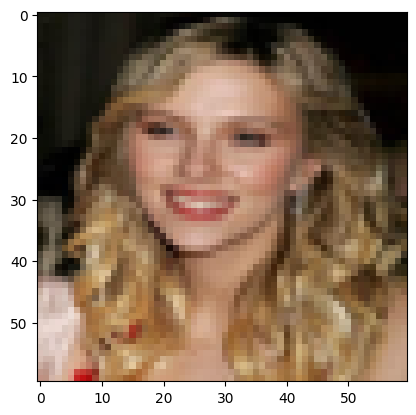

In [38]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

img = Image.open('/content/sample_data/heart (1).jpg').resize((60, 60))
plt.imshow(img)
img_array = np.array(img)
img_array = img_array.astype('float32') / 255.0
# Reshape the image to match the input shape of the model
img_array = img_array.reshape(1, 60*60*3)

# Get prediction from the model
prediction = model.predict(img_array)

predicted_class_index = np.argmax(prediction)
flower_name = le.inverse_transform([predicted_class_index])
print("Tiên đoán là:", flower_name[0])